## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa.csv')
df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Flag,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/flags/7.png
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Club Logo,https://cdn.sofifa.org/teams/2/light/241.png,https://cdn.sofifa.org/teams/2/light/45.png,https://cdn.sofifa.org/teams/2/light/73.png,https://cdn.sofifa.org/teams/2/light/11.png,https://cdn.sofifa.org/teams/2/light/10.png


## 2. Dropping unnecessary columns:

The following columns were found unnecessary:

1. Name : Since ID of each player is provided name has redundant information and cannot be used if we use regression.
2. Photo : Since the scope of this project is not computer vision we cannot extract information from photos.
3. Flag/Club logo : Similar to photo.
4. Jersey Number : Number does not indicate any level or ranking related to his performance.

In [3]:
df_new = df.copy()

In [4]:
df_new = df_new.drop(['Name','Photo','Flag','Club Logo','Jersey Number'],axis=1)

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
ID                          18207 non-null int64
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      16654 non-null object
Loaned From                 1264 non-null object
Contract Valid Until        17918 non-null 

## 3. Conversions :

We have features which are numeric but expressed in string.
Hence, in this step we will convert them to numeric values.

### 1. Value:

In [6]:
df_new['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [7]:
x = pd.Series(['$19.3M', '$10.5M', '0','$20.5M','$11M'])
x

0    $19.3M
1    $10.5M
2         0
3    $20.5M
4      $11M
dtype: object

In [8]:
def strnum(l1):
    lnum = []
    for st in l1:
        if(st !='0'):
            st = st[1:]
            if('.' in st[-3:-2] and 'M' in st[-1]):
                st = st.replace('.','') + ''
                st = st.replace('M','00000') + ''
            elif('M' in st[-1]):
                st = st.replace('M','000000')
           
            elif('.' in st[-3:-2] and 'K' in st[-1]):
                st = st.replace('.','')
                st = st.replace('K','00')
            elif('K' in st[-1]):
                st = st.replace('K','000')
        elif(st=='0'):
                st = '0'
        num = int(st)
        lnum.append(num)
    return (lnum)

In [9]:
x1 = pd.Series([])
list1 = list(x)
lnum = strnum(list1)
x1 = pd.Series(lnum)
x1

0    19300000
1    10500000
2           0
3    20500000
4    11000000
dtype: int64

In [10]:
val = list(df_new['Value'])
valint = strnum(val)
df_new['Value'] = pd.Series(valint)

In [11]:
df_new['Value'].unique()

array([110500000,  77000000, 118500000,  72000000, 102000000,  93000000,
        67000000,  80000000,  51000000,  68000000,  76500000,  44000000,
        60000000,  63000000,  89000000,  83500000,  78000000,  58000000,
        53500000,  51500000,  38000000,  64500000,  27000000,  81000000,
        69500000,  59500000,  62000000,  73500000,  59000000,  46000000,
        43000000,  36000000,  57000000,  24000000,  30000000,   4000000,
        64000000,  30500000,  62500000,  52000000,  45000000,  34000000,
        46500000,  61000000,  41500000,  44500000,  56500000,  53000000,
        50000000,  55000000,  36500000,  45500000,  43500000,  35000000,
        39000000,  18000000,  21500000,  50500000,  54000000,  40500000,
        37500000,  28500000,  37000000,  32000000,  26000000,  33000000,
        38500000,  35500000,   9000000,  15500000,  22000000,  14000000,
        42500000,  31500000,  42000000,  25000000,  29500000,  31000000,
        24500000,  27500000,  29000000,  16500000, 

### 2. Wage:

In [12]:
wage = list(df_new['Wage'])
wageint = strnum(wage)
df_new['Wage'] = pd.Series(wageint)

In [13]:
df_new['Wage'].unique()

array([565000, 405000, 290000, 260000, 355000, 340000, 420000, 455000,
       380000,  94000, 205000, 125000, 285000, 225000, 145000, 240000,
       315000, 200000, 130000, 300000, 215000, 100000, 255000, 165000,
       265000, 160000, 150000, 245000, 110000,  77000, 115000, 210000,
       195000, 230000, 250000, 135000, 155000, 180000, 175000, 190000,
       185000,  21000,  82000,  73000,  92000,  88000,  96000, 170000,
        66000, 235000,  28000, 105000,  38000,  81000,  57000,  15000,
        63000,  22000,  84000, 120000,  90000,  72000,  93000,  45000,
        74000,  51000,  42000,  31000,  75000,  25000, 140000,  41000,
        78000,  53000,  95000,  80000,  43000,  60000,  85000,  64000,
        67000,  18000,  70000,  91000,  20000,  49000,  87000,  86000,
        26000,  29000,  55000,  35000,  33000,  56000,  30000,  11000,
        59000,  23000,  46000,  39000,  32000,  36000,  98000,  54000,
        68000,  58000,  27000,  40000,  44000,  19000,   1000,  61000,
      

### 3. Joined:

In [14]:
df_new['Joined'] = df_new['Joined'].str[-4:]
df_new['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
5        2012
6        2012
7        2014
8        2005
9        2014
10       2014
11       2014
12       2010
13       2010
14       2016
15       2015
16       2010
17       2014
18       2014
19       2018
20       2008
21       2013
22       2011
23       2011
24       2005
25       2018
26       2017
27       2013
28        NaN
29       2010
         ... 
18177    2016
18178    2018
18179    2018
18180    2013
18181    2017
18182    2018
18183    2018
18184    2017
18185    2018
18186    2016
18187    2017
18188    2017
18189    2017
18190    2018
18191    2018
18192    2018
18193    2018
18194    2018
18195    2018
18196    2017
18197    2018
18198    2018
18199    2018
18200    2015
18201    2018
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: object

In [15]:
df_new['Joined'].unique()

array(['2004', '2018', '2017', '2011', '2015', '2012', '2014', '2005',
       '2010', '2016', '2008', '2013', nan, '2007', '2009', '2002',
       '2003', '2006', '2001', '1991', '1998', '2000', '1999'],
      dtype=object)

In [16]:
df_new['Joined'] = df_new['Joined'].astype('float64')

### 4. Contract valid until:

In [17]:
df_new['Contract Valid Until'] = pd.to_datetime(df_new['Contract Valid Until'])

### 5. Weight

In [18]:
df_new['Weight'] = df_new['Weight'].str[:-3]

In [19]:
df_new['Weight'].unique()

array(['159', '183', '150', '168', '154', '163', '146', '190', '181',
       '192', '176', '172', '148', '165', '196', '161', '187', '212',
       '170', '203', '157', '185', '130', '174', '207', '134', '141',
       '152', '179', '132', '201', '198', '209', '214', '143', '205',
       '137', '194', '216', '139', '220', '126', '218', '123', '227',
       '128', '223', '225', '121', '115', '117', '236', '229', '243', nan,
       '110', '119', '234'], dtype=object)

In [20]:
df_new['Weight'] = df_new['Weight'].astype('float64')

### 6. Release Clause:

In [21]:
rc = list(df_new['Release Clause'])
rcint = strnum(val)
df_new['Value'] = pd.Series(rcint)

### 7. Height:

In [22]:
df_new['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [23]:
"didn't".replace("'",'')

'didnt'

In [24]:
import math
x = float('nan')
if(math.isnan(x)):
    print('Nan value')

Nan value


In [25]:
l1 = [2.2,3.5,np.nan]
l1

[2.2, 3.5, nan]

In [26]:
str1 = ['1','2',np.nan]
pd.isnull(np.nan)

True

In [38]:
df_new['Height'] = df_new['Height'].str.replace("'",'.')

In [39]:
import math
def meter(st):
    height = []
    #print(st)
    if(pd.isnull(st)):
        m = float(st) * 0.0
    else:
        inc = float(st[2:])
        #print(inc)
        #print(inc)
        ft = float(st[0])
        m = inc * 2.54 + ft * 30.48
        #print(m)
    return m

In [40]:
height = []
for i in df_new['Height']:
    h = meter(i)
    height.append(h)
#print(height)
df_new['Height'] = pd.Series(height)

Till here we have completed our conversions into required datatypes. Now we will deal with missing values

## 4. Missing value treatment:

In [41]:
def details(df_new):
    miss = pd.DataFrame([])
    miss['Columns'] = df_new.isnull().any()
    miss['Null values'] = df_new.isnull().sum()
    miss['Percentage'] = (df_new.isnull().sum()/18207)*100
    miss['Datatype'] = df_new.dtypes
    print(miss)

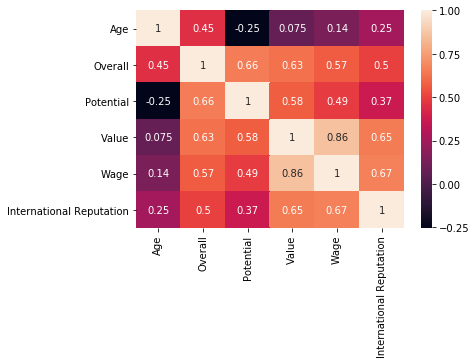

In [42]:
corrmat2 = df_new[['Age','Overall', 'Potential','Value','Wage','International Reputation']]
sns.heatmap(data = corrmat2.corr(),annot=True)

In [43]:
df_new.columns

Index(['ID', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

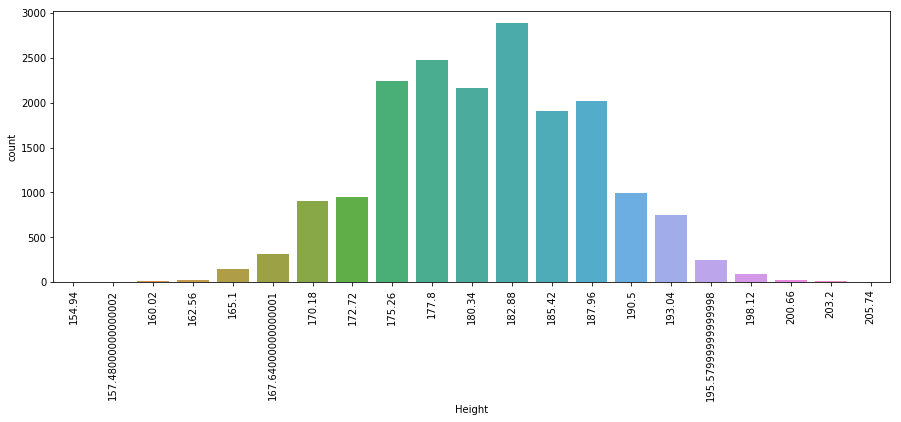

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(df_new['Height'].dropna())
plt.xticks(rotation=90)

In [45]:
fill = df_new[['Age','Overall', 'Potential','Value','Wage','Preferred Foot', 'International Reputation', 'Weak Foot',
                 'Skill Moves', 'Work Rate', 'Body Type','Height', 'Weight', 'Crossing',
                 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [46]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2, np.nan], [np.nan, 3, 18], [7, 6, 2]])  


X = [[np.nan, 2, 23], [6, np.nan, np.nan], [7, 6, 14]]
print(imp.transform(X))

[[ 4.          2.         23.        ]
 [ 6.          3.66666667 10.        ]
 [ 7.          6.         14.        ]]


In [47]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
new = imp.fit_transform(fill)

In [48]:
new = pd.DataFrame(new)

In [49]:
new.columns = ['Age','Overall', 'Potential','Value','Wage','Preferred Foot', 'International Reputation', 'Weak Foot',
                 'Skill Moves', 'Work Rate', 'Body Type','Height', 'Weight', 'Crossing',
                 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                 'GKKicking', 'GKPositioning', 'GKReflexes']

In [50]:
new.isnull().sum()

Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression

In [51]:
df_new[['Age','Overall', 'Potential','Value','Wage','Preferred Foot', 'International Reputation', 'Weak Foot',
                 'Skill Moves', 'Work Rate', 'Body Type','Height', 'Weight', 'Crossing',
                 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                 'GKKicking', 'GKPositioning', 'GKReflexes']]=new

In [52]:
details(df_new)

                          Columns  Null values  Percentage        Datatype
ID                          False            0    0.000000           int64
Age                         False            0    0.000000          object
Nationality                 False            0    0.000000          object
Overall                     False            0    0.000000          object
Potential                   False            0    0.000000          object
Club                         True          241    1.323667          object
Value                       False            0    0.000000          object
Wage                        False            0    0.000000          object
Preferred Foot              False            0    0.000000          object
International Reputation    False            0    0.000000          object
Weak Foot                   False            0    0.000000          object
Skill Moves                 False            0    0.000000          object
Work Rate                

1. Club missing values will be replaced by value 'Country Domestic' assuming that these players are not involved in international clubs in football.
2. Players with age around 30 will be replaced with joining year 6 years behind the current year and those having age around 20 will have joining year 2 years behind current year.
3. Loaned from will be converted into a categorical column of loaned or not loaned.

## 1. Club

In [53]:
df_new[df_new['Club'].isnull()]['International Reputation'].value_counts()

1.0    227
2.0     13
3.0      1
Name: International Reputation, dtype: int64

In [54]:
df_new.loc[df_new['Club'].isnull(),['Club']] = 'Country Domestic'

In [55]:
df_new['Club'].isnull().sum()

0

In [56]:
details(df_new)

                          Columns  Null values  Percentage        Datatype
ID                          False            0    0.000000           int64
Age                         False            0    0.000000          object
Nationality                 False            0    0.000000          object
Overall                     False            0    0.000000          object
Potential                   False            0    0.000000          object
Club                        False            0    0.000000          object
Value                       False            0    0.000000          object
Wage                        False            0    0.000000          object
Preferred Foot              False            0    0.000000          object
International Reputation    False            0    0.000000          object
Weak Foot                   False            0    0.000000          object
Skill Moves                 False            0    0.000000          object
Work Rate                

## 2. Joining

In [58]:
df[df['Joined'].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,198710,J. Rodríguez,26,https://cdn.sofifa.org/players/4/19/198710.png,Colombia,https://cdn.sofifa.org/flags/56.png,88,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,https://cdn.sofifa.org/teams/2/light/47.png,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,187961,Paulinho,29,https://cdn.sofifa.org/players/4/19/187961.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Guangzhou Evergrande Taobao FC,https://cdn.sofifa.org/teams/2/light/111839.png,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,212523,Anderson Talisca,24,https://cdn.sofifa.org/players/4/19/212523.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,90,Guangzhou Evergrande Taobao FC,https://cdn.sofifa.org/teams/2/light/111839.png,...,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,207410,M. Kovačić,24,https://cdn.sofifa.org/players/4/19/207410.png,Croatia,https://cdn.sofifa.org/flags/10.png,83,89,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
332,216409,M. Politano,24,https://cdn.sofifa.org/players/4/19/216409.png,Italy,https://cdn.sofifa.org/flags/27.png,81,84,Inter,https://cdn.sofifa.org/teams/2/light/44.png,...,79.0,63.0,29.0,29.0,11.0,12.0,6.0,8.0,11.0,NaN
354,203890,S. Vrsaljko,26,https://cdn.sofifa.org/players/4/19/203890.png,Croatia,https://cdn.sofifa.org/flags/10.png,81,84,Inter,https://cdn.sofifa.org/teams/2/light/44.png,...,67.0,77.0,81.0,77.0,15.0,11.0,10.0,10.0,12.0,NaN
357,202685,S. Zaza,27,https://cdn.sofifa.org/players/4/19/202685.png,Italy,https://cdn.sofifa.org/flags/27.png,81,82,Torino,https://cdn.sofifa.org/teams/2/light/54.png,...,72.0,54.0,42.0,50.0,7.0,13.0,9.0,7.0,9.0,NaN
427,226226,G. Lo Celso,22,https://cdn.sofifa.org/players/4/19/226226.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,86,Real Betis,https://cdn.sofifa.org/teams/2/light/449.png,...,79.0,61.0,67.0,67.0,10.0,7.0,10.0,15.0,14.0,NaN
434,219809,T. Bakayoko,23,https://cdn.sofifa.org/players/4/19/219809.png,France,https://cdn.sofifa.org/flags/18.png,80,85,Milan,https://cdn.sofifa.org/teams/2/light/47.png,...,68.0,71.0,84.0,82.0,11.0,15.0,11.0,14.0,10.0,NaN


In [59]:
contract = df_new['Contract Valid Until'].dt.year
joined  = df_new['Joined']
Duration = contract - joined
Duration.value_counts()

3.0     4298
2.0     3092
4.0     2695
5.0     2024
1.0     1580
6.0      898
7.0      620
8.0      406
0.0      269
9.0      265
10.0     197
11.0      90
12.0      73
13.0      50
14.0      26
15.0      23
17.0      15
16.0      14
18.0       6
19.0       3
20.0       3
21.0       3
23.0       2
30.0       1
22.0       1
dtype: int64

In [60]:
df_new.loc[((df_new['Age']>26) & (df_new['Age']<33)),['Overall']]['Overall'].value_counts()

68    400
69    396
66    386
67    382
70    366
71    327
65    310
72    300
64    299
73    281
63    246
74    238
75    204
62    193
76    184
77    147
61    118
79     87
60     75
78     66
80     64
59     54
82     49
81     41
58     31
83     31
84     22
57     22
85     20
55     13
56     12
86     11
87      9
88      7
89      6
91      6
90      4
52      4
50      3
53      2
54      2
51      1
94      1
Name: Overall, dtype: int64

In [61]:
topclubs = ['Arsenal','Aston Villa','Bournemouth','Brighton & Hove Albion','Burnley','Chelsea','Crystal Palace','Everton',
            'Leicester City','Liverpool','Manchester City','Manchester United','Newcastle United','Norwich City','Sheffield United',
            'saints','Tottenham Hotspur','Watford','West Ham United','Wolverhampton Wanderers']
present = list(df_new.Club.unique())
present

['FC Barcelona',
 'Juventus',
 'Paris Saint-Germain',
 'Manchester United',
 'Manchester City',
 'Chelsea',
 'Real Madrid',
 'Atlético Madrid',
 'FC Bayern München',
 'Tottenham Hotspur',
 'Liverpool',
 'Napoli',
 'Arsenal',
 'Milan',
 'Inter',
 'Lazio',
 'Borussia Dortmund',
 'Vissel Kobe',
 'Olympique Lyonnais',
 'Roma',
 'Valencia CF',
 'Guangzhou Evergrande Taobao FC',
 'FC Porto',
 'FC Schalke 04',
 'Beşiktaş JK',
 'LA Galaxy',
 'Sporting CP',
 'Real Betis',
 'Olympique de Marseille',
 'RC Celta',
 'Bayer 04 Leverkusen',
 'Real Sociedad',
 'Villarreal CF',
 'Sevilla FC',
 'SL Benfica',
 'AS Saint-Étienne',
 'AS Monaco',
 'Leicester City',
 'Atalanta',
 'Grêmio',
 'Atlético Mineiro',
 'RB Leipzig',
 'Ajax',
 'Dalian YiFang FC',
 'Everton',
 'West Ham United',
 '1. FC Köln',
 'TSG 1899 Hoffenheim',
 'Shanghai SIPG FC',
 'OGC Nice',
 'Al Nassr',
 'Wolverhampton Wanderers',
 'Borussia Mönchengladbach',
 'Hertha BSC',
 'SV Werder Bremen',
 'Cruzeiro',
 'Athletic Club de Bilbao',
 'Tori

In [62]:
flag = 0
if(all(x in present for x in topclubs)): 
    flag = 1
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

No, list is not subset of other.


In [63]:
teams = []
for i in topclubs:
    if (i in present):
        teams.append(i)
    else:
        continue
teams

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brighton & Hove Albion',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Norwich City',
 'Sheffield United',
 'Tottenham Hotspur',
 'Watford',
 'West Ham United',
 'Wolverhampton Wanderers']

In [64]:
age = list(df_new['Age'].unique())
overall = list(df_new['Overall'].unique())

In [65]:
x = df_new.loc[df_new.Joined.isnull(),['Age','Overall','Club','Joined']]
Join = x.copy()

In [67]:
J1 = []
for index,rows in Join.iterrows():
    if(rows.Age>=16 and rows.Age<=25):
        if(rows.Overall>75):
            if(rows.Club not in teams):
                J1.append(2018.0)
            else:
                J1.append(2016.0)
        elif(rows.Overall<=75):
             if(rows.Club not in teams):
                J1.append(2015.0)
             else:
                J1.append(2018.0)
    elif(rows.Age>=26 and rows.Age<=33):
        if(rows.Overall>80):
            if(rows.Club not in teams):
                J1.append(2015.0)
            else:
                J1.append(2017.0)
        elif(rows.Overall<=80):
             if(rows.Club not in teams):
                J1.append(2016.0)
             else:
                J1.append(2018.0)
    elif(rows.Age>33):
        J1.append(2013.0)

In [68]:
Join['Joined'] = J1
Join['Joined'].isnull().sum()

0

In [69]:
df_new['Joined'] = df_new['Joined'].fillna(Join['Joined'])

In [70]:
details(df_new)

                          Columns  Null values  Percentage        Datatype
ID                          False            0    0.000000           int64
Age                         False            0    0.000000          object
Nationality                 False            0    0.000000          object
Overall                     False            0    0.000000          object
Potential                   False            0    0.000000          object
Club                        False            0    0.000000          object
Value                       False            0    0.000000          object
Wage                        False            0    0.000000          object
Preferred Foot              False            0    0.000000          object
International Reputation    False            0    0.000000          object
Weak Foot                   False            0    0.000000          object
Skill Moves                 False            0    0.000000          object
Work Rate                

## 3. Position

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

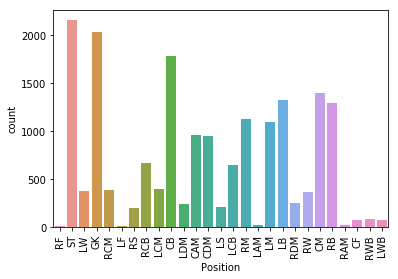

In [68]:
sns.countplot(df_new['Position'])
plt.xticks(rotation=90)

In [73]:
df.loc[df['Position'] == 'RF',:]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
50,175943,D. Mertens,31,https://cdn.sofifa.org/players/4/19/175943.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,€76.5M
528,172114,D. Valeri,32,https://cdn.sofifa.org/players/4/19/172114.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,80,Portland Timbers,https://cdn.sofifa.org/teams/2/light/111140.png,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,€17.3M
890,150516,L. Podolski,33,https://cdn.sofifa.org/players/4/19/150516.png,Germany,https://cdn.sofifa.org/flags/21.png,78,78,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,€8.1M
1774,201313,C. Ciano,28,https://cdn.sofifa.org/players/4/19/201313.png,Italy,https://cdn.sofifa.org/flags/27.png,75,75,Frosinone,https://cdn.sofifa.org/teams/2/light/111657.png,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,€11.7M
3255,216334,P. Gerkens,23,https://cdn.sofifa.org/players/4/19/216334.png,Belgium,https://cdn.sofifa.org/flags/7.png,72,77,RSC Anderlecht,https://cdn.sofifa.org/teams/2/light/229.png,...,73.0,61.0,66.0,63.0,12.0,10.0,10.0,9.0,13.0,€6.5M
3596,221820,Zhang Xizhe,27,https://cdn.sofifa.org/players/4/19/221820.png,China PR,https://cdn.sofifa.org/flags/155.png,72,72,Beijing Sinobo Guoan FC,https://cdn.sofifa.org/teams/2/light/111768.png,...,67.0,34.0,45.0,47.0,14.0,9.0,15.0,14.0,15.0,€7.2M
3759,220084,C. Falletti,25,https://cdn.sofifa.org/players/4/19/220084.png,Uruguay,https://cdn.sofifa.org/flags/60.png,72,75,Palermo,https://cdn.sofifa.org/teams/2/light/1843.png,...,72.0,50.0,18.0,12.0,11.0,6.0,7.0,5.0,13.0,NaN
5465,231628,Rafa Mir,21,https://cdn.sofifa.org/players/4/19/231628.png,Spain,https://cdn.sofifa.org/flags/45.png,70,81,UD Las Palmas,https://cdn.sofifa.org/teams/2/light/472.png,...,64.0,42.0,41.0,35.0,12.0,11.0,15.0,10.0,6.0,NaN
6108,224385,H. Yamada,29,https://cdn.sofifa.org/players/4/19/224385.png,Japan,https://cdn.sofifa.org/flags/163.png,69,69,Júbilo Iwata,https://cdn.sofifa.org/teams/2/light/101144.png,...,64.0,51.0,48.0,46.0,9.0,15.0,9.0,7.0,16.0,€1.3M
